## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Dataframes/auto-mpg.csv')

# Data Exploration

In [ ]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,U.S,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,U.S,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,U.S,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,U.S,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,U.S,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


We can see that our data has 6 missing values in the 'horsepower' column.

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Data Pre-Processing

We will replace these missing values with the mean of the 'horsepower' column:

In [ ]:
horsepower_mean = df['horsepower'].mean()
df['horsepower'].fillna(horsepower_mean, inplace=True)

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Next we will have to find out the unique values of the origin column to be able to encode them:

In [ ]:
unique_origins = df['origin'].unique()
print("Unique values in the 'origin' column:", unique_origins)

Unique values in the 'origin' column: ['U.S' 'EU' 'other']


Then we proceed with mapping each value to an integer as follows:

In [ ]:
origin_mapping = {
    'U.S': 1,
    'EU': 2,
    'other': 3
}
df['origin'] = df['origin'].map(origin_mapping)
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


Drop the 'car name' column as it is not helpfull:

In [ ]:
df_clean = df.drop('car name', axis=1)
df_clean.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


Now let's standardize the features and split our data:

In [ ]:
X = df_clean[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df_clean['mpg']

# Standardize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Visualization

Now we will plot some barplots to get insight over how are data is distributed:

Plot the bivariate pairplot and the heatmap to get an idea about the relations between the different columns:

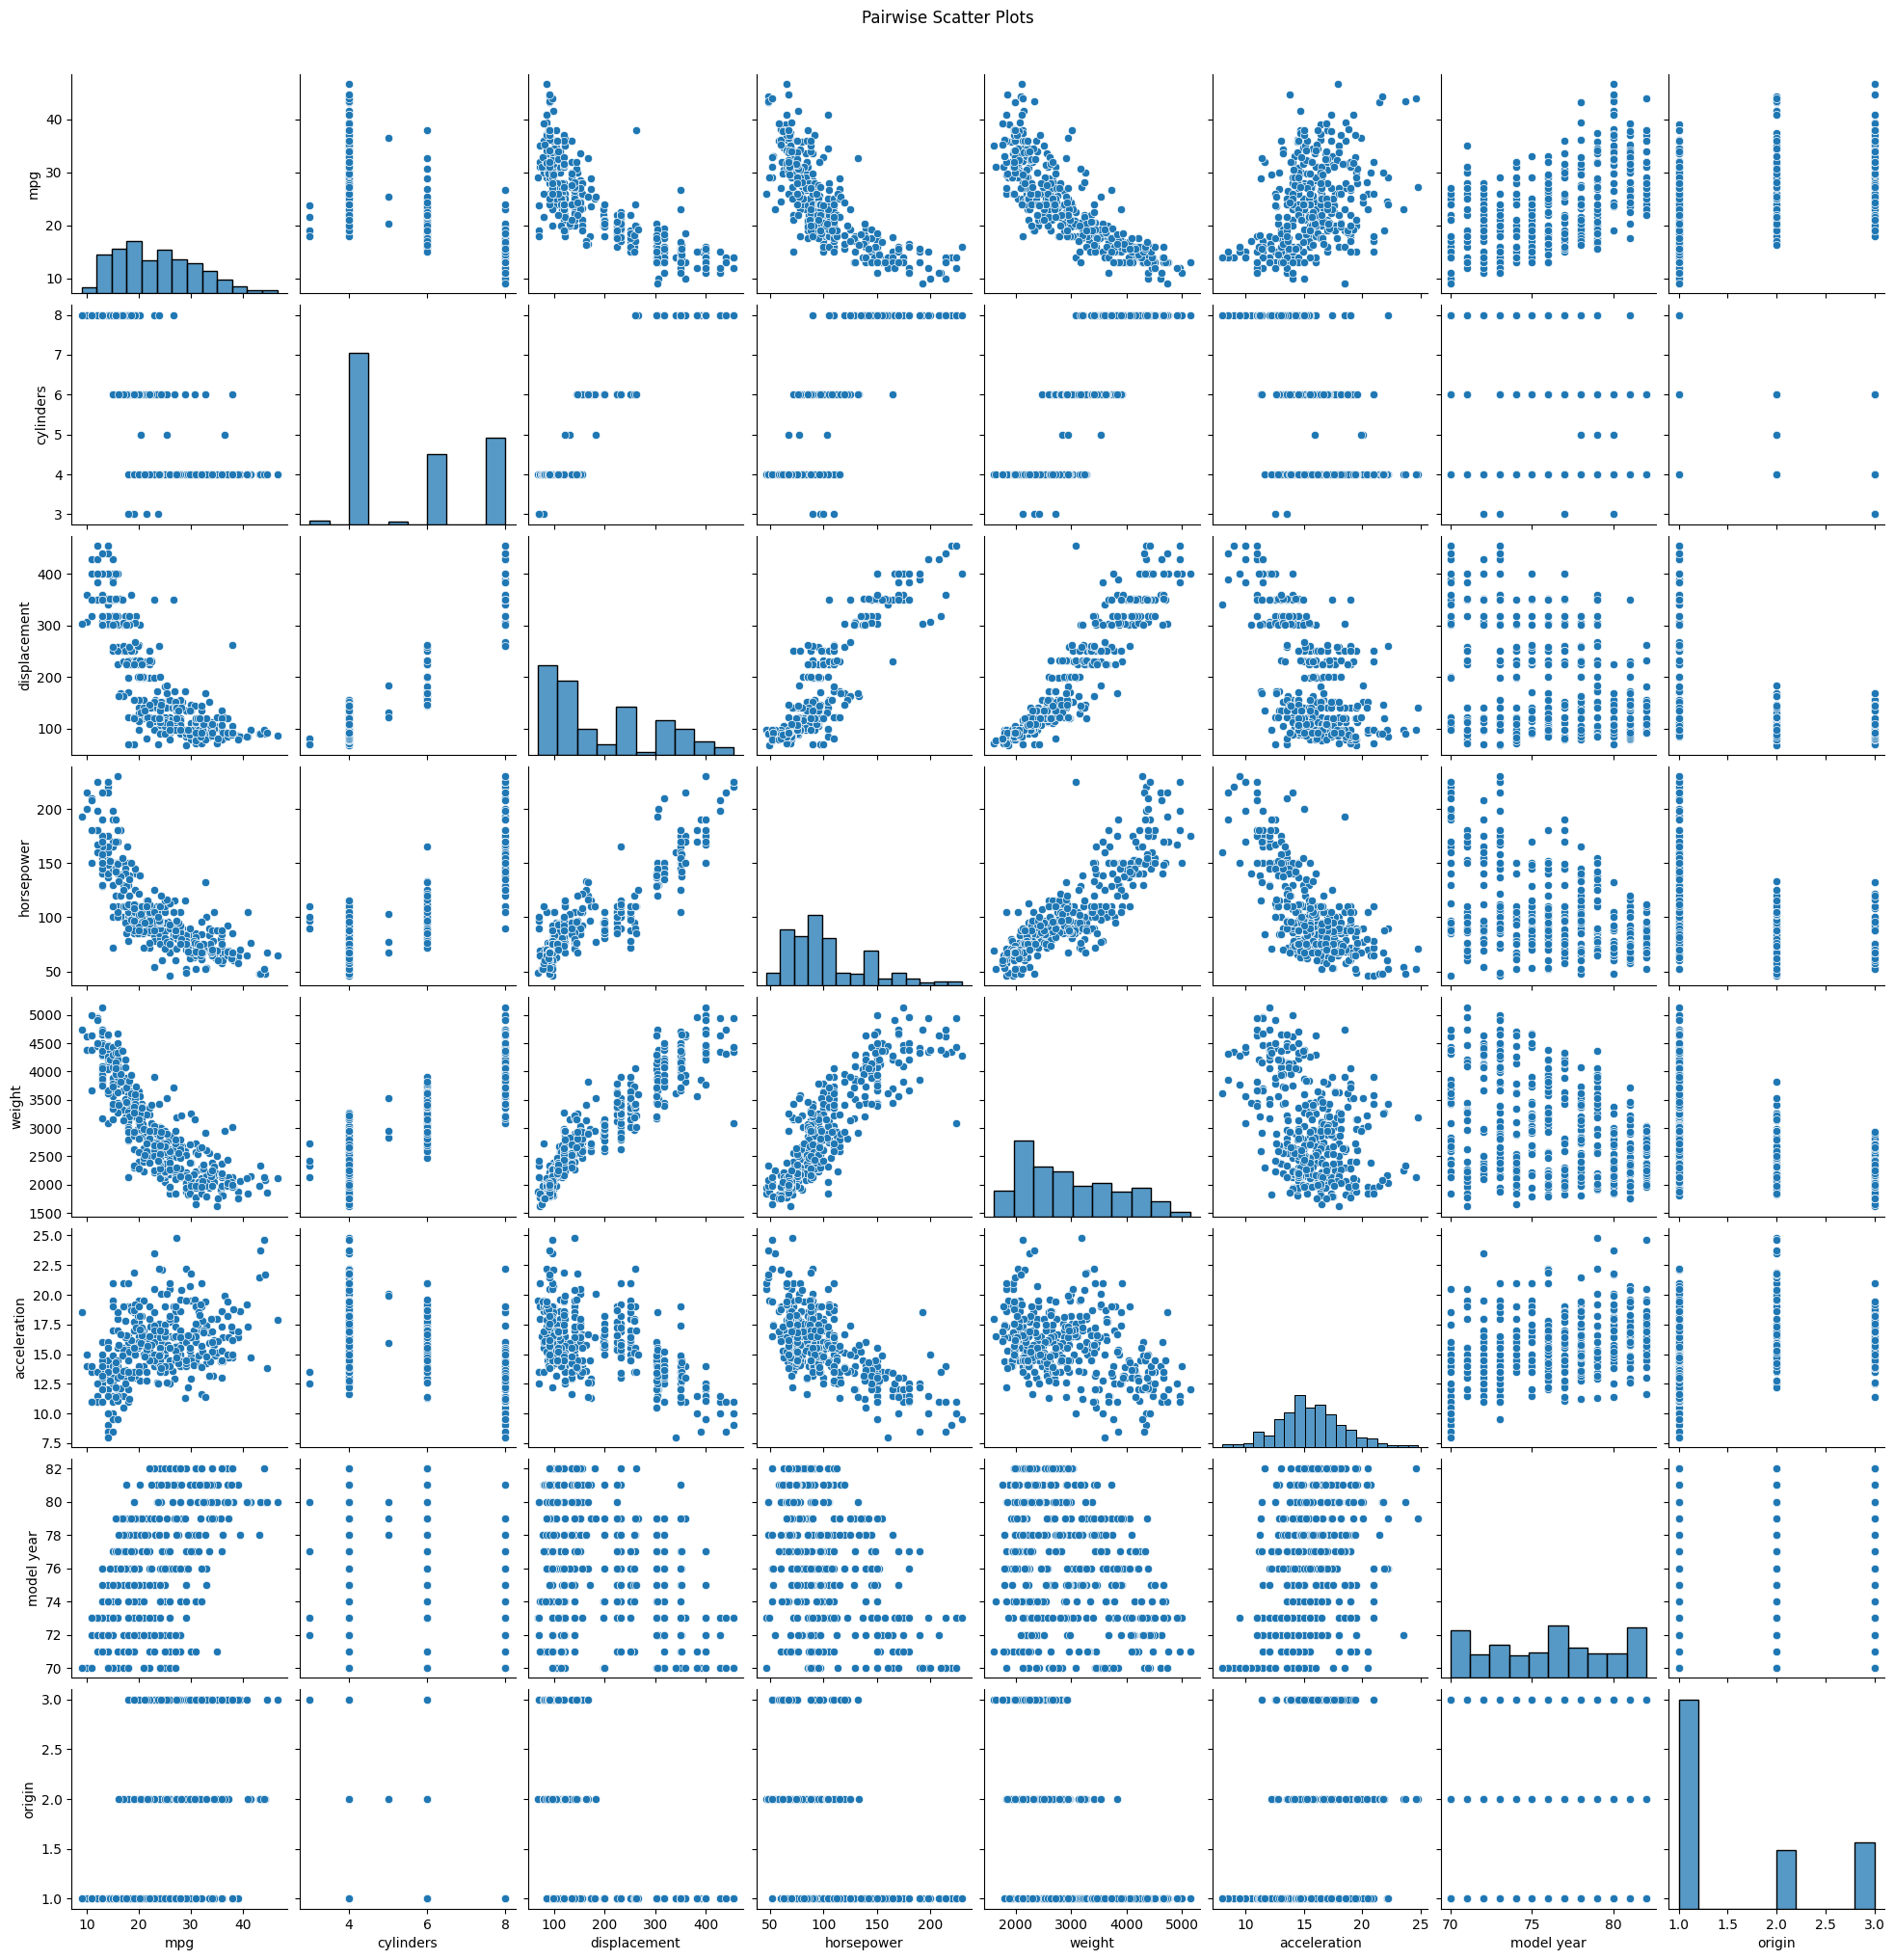

In [ ]:
sns.pairplot(df_clean)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

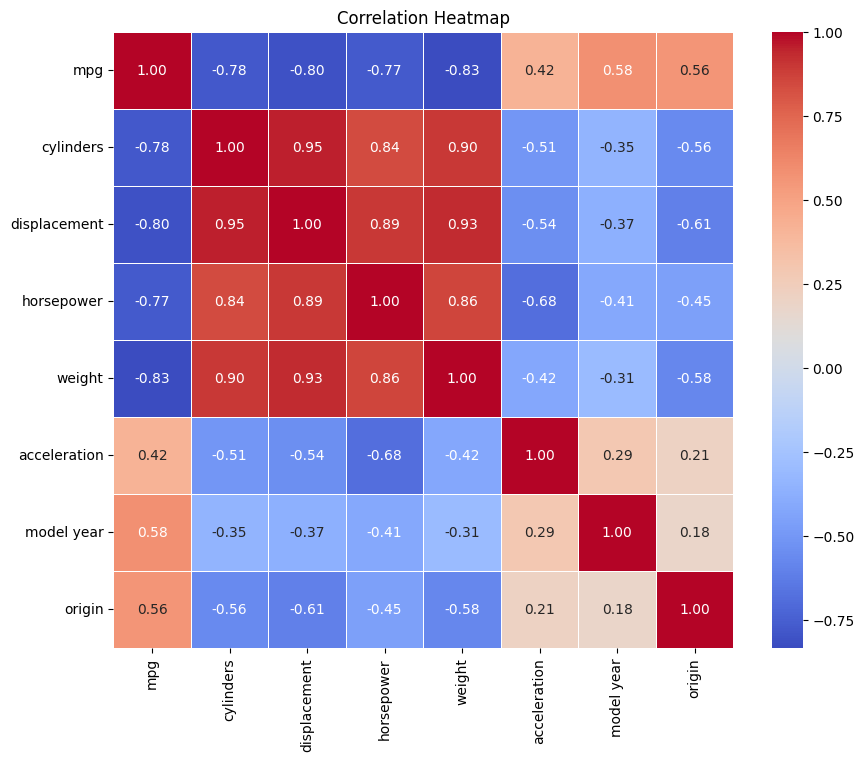

In [ ]:
correlation_matrix = df_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We can notice that we have many strong corrolations between some of the variables, for instance:
- The 'mpg' has a strong negative curvilinear relationship with each of the 'displacement', 'horsepower' and 'weight' variables. We can say that the 'mpg' values go down as the 'displacement', 'horsepower' and 'weight' values increase, and also decreases as the number of cylinders 'cylinders' increases.
- We can also spot a trend where the 'mpg' values are improving throughout the years.
- The 'displacement', 'horsepower' and 'weight' variables are strongly corrolated to the number of cylinders and increase as it increases.
- The 'horsepower' and 'weight' variables are strongly linearly corrolated to the 'displacement' variable.
- The 'weight' variable is strongly linearly corrolated to the 'horsepower' variable.

# Training

In [ ]:
# Define the Elastic Net model
model_ElasticNet = ElasticNet()

# Initialize the hyperparameter grid for Grid Search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength (L1 + L2)
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Mixing parameter (0: Ridge, 1: Lasso)
}

# Perform Grid Search to find the best hyperparameters
grid_search_ElasticNet = GridSearchCV(model_ElasticNet, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_ElasticNet.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_ElasticNet = grid_search_ElasticNet.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model_ElasticNet.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("Alpha:", grid_search_ElasticNet.best_params_['alpha'])
print("L1 Ratio:", grid_search_ElasticNet.best_params_['l1_ratio'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)

Best Hyperparameters:
Alpha: 0.001
L1 Ratio: 0.7
Best Mean Squared Error (MSE): 12.998241139864428
Best R-squared (R2): 0.7969594089022201


In [ ]:
# Define the Lasso regression model
model_Lasso = Lasso()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Perform Grid Search to find the best hyperparameters
grid_search_Lasso = GridSearchCV(model_Lasso, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_Lasso.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_Lasso = grid_search_Lasso.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model_Lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("Alpha:", grid_search_Lasso.best_params_['alpha'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)


Best Hyperparameters:
Alpha: 0.001
Best Mean Squared Error (MSE): 12.918484498587599
Best R-squared (R2): 0.7982052571223424


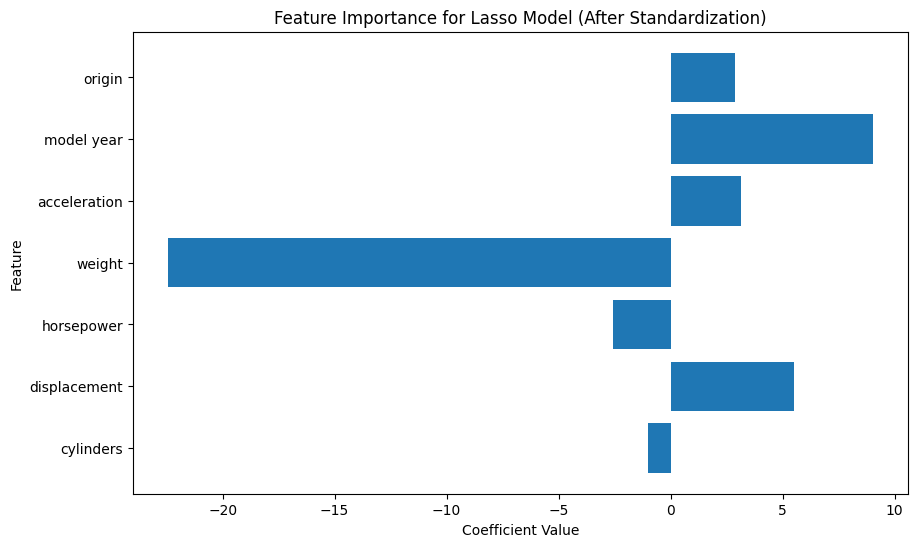

In [ ]:
# Get the coefficients (weights) assigned to each feature
coefficients = best_model_Lasso.coef_

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])  # Exclude the target variable
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Lasso Model (After Standardization)')
plt.show()

In [ ]:
# Define the KNN regression model
model_KNN = KNeighborsRegressor()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Values of k (number of neighbors)
}

# Perform Grid Search to find the best hyperparameters
grid_search_KNN = GridSearchCV(model_KNN, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_KNN.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_KNN = grid_search_KNN.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model_KNN.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("Number of Neighbors (k):", grid_search_KNN.best_params_['n_neighbors'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)

Best Hyperparameters:
Number of Neighbors (k): 5
Best Mean Squared Error (MSE): 8.421595
Best R-squared (R2): 0.8684494610934766


In [ ]:
# Define the Support Vector Machine regression model
model_SVR = SVR()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 1],  # Epsilon parameter for the epsilon-SVR
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# Perform Grid Search to find the best hyperparameters
grid_search_SVR = GridSearchCV(model_SVR, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_SVR.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_SVR = grid_search_SVR.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model_SVR.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("C:", grid_search_SVR.best_params_['C'])
print("Epsilon:", grid_search_SVR.best_params_['epsilon'])
print("Kernel:", grid_search_SVR.best_params_['kernel'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)

Best Hyperparameters:
C: 10
Epsilon: 1
Kernel: rbf
Best Mean Squared Error (MSE): 7.629984471479352
Best R-squared (R2): 0.8808149086875451


In [ ]:
# Define the Support Vector Machine regression model with a linear kernel
model_SVRrbf = SVR(kernel='rbf')

# Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [16, 18, 20, 22, 24]  # Regularization parameter
}

# Perform Grid Search to find the best hyperparameters
grid_search_SVRrbf = GridSearchCV(model_SVRrbf, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_SVRrbf.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_SVRrbf = grid_search_SVRrbf.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model_SVRrbf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("C:", grid_search_SVRrbf.best_params_['C'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)

Best Hyperparameters:
C: 20
Best Mean Squared Error (MSE): 6.993240097036024
Best R-squared (R2): 0.8907612508713852


In [ ]:
# Define the Decision Tree regression model
model_DT = DecisionTreeRegressor()

# Initialize the hyperparameter grid for Grid Search
param_grid = {
    'criterion': ['friedman_mse'],
    'max_depth': [2,3,4,5]  # Maximum depth of the tree
}

# Perform Grid Search to find the best hyperparameters
grid_search_DT = GridSearchCV(model_DT, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_DT.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model_DT = grid_search_DT.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model_DT.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("Criterion:", grid_search_DT.best_params_['criterion'])
print("Max Depth:", grid_search_DT.best_params_['max_depth'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)

Best Hyperparameters:
Criterion: friedman_mse
Max Depth: 5
Best Mean Squared Error (MSE): 10.3781587537546
Best R-squared (R2): 0.8378867213498309


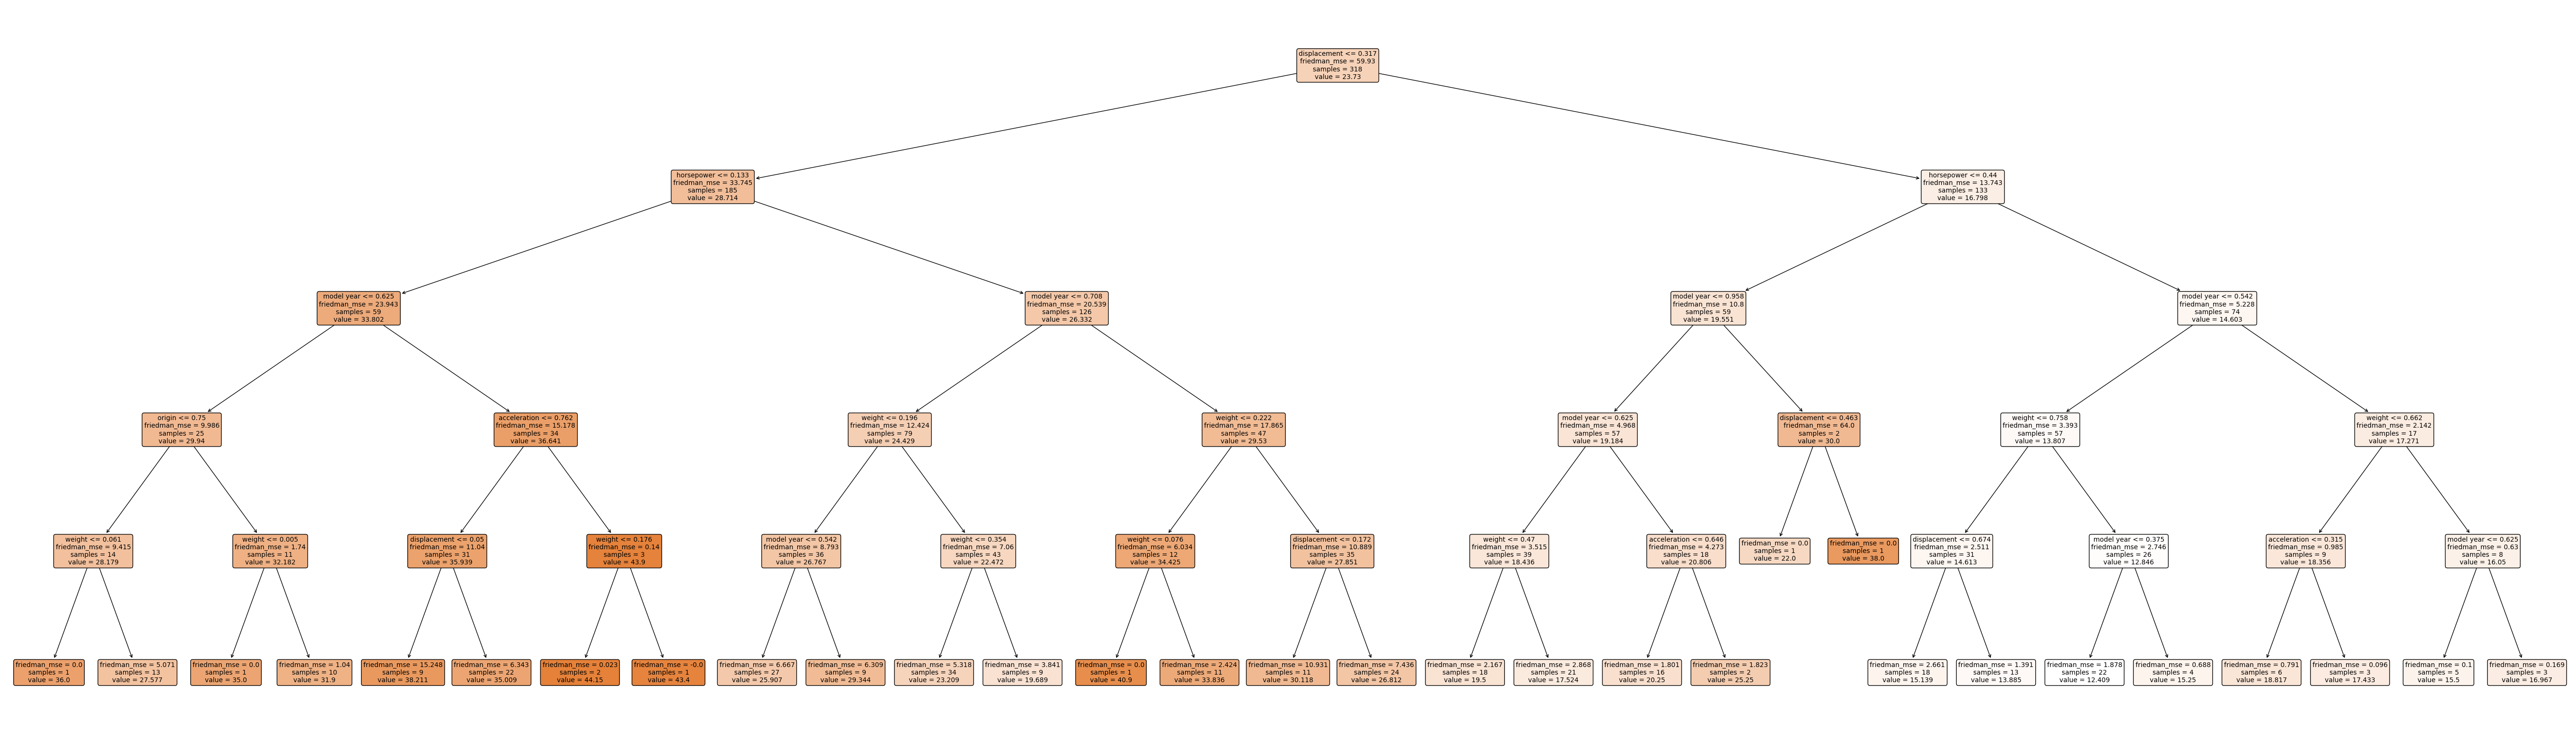

In [ ]:
plt.figure(figsize=(70, 20))
plot_tree(best_model_DT, filled=True, feature_names = df.columns[1:], rounded=True, class_names=['mpg'], fontsize=10)
plt.show()